# DSC680 Project3: Beast Cancer Survival Prediction
# Assignment 10.1
# Name: Madhuri Basava
# Date: 08/02/2024

In [1]:
# pip install xgboost imbalanced-learn scikit-optimize sweetviz

In [2]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, accuracy_score, classification_report
import sweetviz as sv
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from scipy import stats as ss
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
# Load the Breast Cancer dataset into the data frame
breast_cancer_df = pd.read_csv('BRCA.csv')
breast_cancer_df

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Display the information to understand the dataset
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    float64
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

In [5]:
# Check for any missing values
breast_cancer_df.isna().sum()

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

In [6]:
# Drop the missing values
# breast_cancer_df.dropna(how='all', inplace=True)
# breast_cancer_df.dropna(subset='Patient_Status', inplace = True)

# Filter rows with at least one NaN value
breast_cancer_df = breast_cancer_df.dropna()
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          317 non-null    object 
 1   Age                 317 non-null    float64
 2   Gender              317 non-null    object 
 3   Protein1            317 non-null    float64
 4   Protein2            317 non-null    float64
 5   Protein3            317 non-null    float64
 6   Protein4            317 non-null    float64
 7   Tumour_Stage        317 non-null    object 
 8   Histology           317 non-null    object 
 9   ER status           317 non-null    object 
 10  PR status           317 non-null    object 
 11  HER2 status         317 non-null    object 
 12  Surgery_type        317 non-null    object 
 13  Date_of_Surgery     317 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      317 non-null    object 
dtypes: float64(5)

In [7]:
breast_cancer_df

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,TCGA-AN-A04A,36.0,FEMALE,0.231800,0.61804,-0.55779,-0.517350,III,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Simple Mastectomy,11-Nov-19,09-Feb-20,Dead
330,TCGA-A8-A085,44.0,MALE,0.732720,1.11170,-0.26952,-0.354920,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,01-Nov-19,04-Mar-20,Dead
331,TCGA-A1-A0SG,61.0,FEMALE,-0.719470,2.54850,-0.15024,0.339680,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,11-Nov-19,18-Jan-21,Dead
332,TCGA-A2-A0EU,79.0,FEMALE,0.479400,2.05590,-0.53136,-0.188480,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,21-Nov-19,19-Feb-21,Dead


In [8]:
# Check if there are duplicate rows in the data set
breast_cancer_df.duplicated().sum()

0

### Exploratory Data Analysis

In [9]:
breast_cancer_df.describe()

,Age,Protein1,Protein2,Protein3,Protein4
count,317.000000,317.000000,317.000000,317.000000,317.000000
mean,58.725552,-0.027232,0.949557,-0.095104,0.006713
std,12.827374,0.543858,0.906153,0.589027,0.625965
min,29.000000,-2.144600,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.350600,0.368840,-0.531360,-0.382240
50%,58.000000,0.005649,0.997130,-0.193040,0.038522
75%,67.000000,0.336260,1.612000,0.251210,0.436250
max,90.000000,1.593600,3.402200,2.193400,1.629900


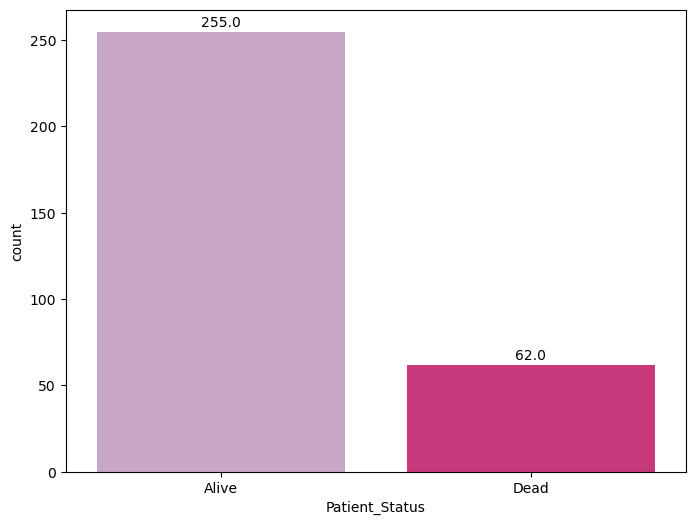

In [10]:
# Target distribution

# Set the figure size and create a count plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=breast_cancer_df['Patient_Status'], palette='PuRd')

# Add labels to each bar in the plot
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2, p.get_height()+3, f'{p.get_height()}', ha="center")

plt.show()

In [11]:
breast_cancer_df['Gender'].value_counts()

Gender
FEMALE    313
MALE        4
Name: count, dtype: int64

#### Gender is not a useful feature in this case as there are only a few male patients

Text(0.5, 1.0, 'Age Distribution of BRCA Patients')

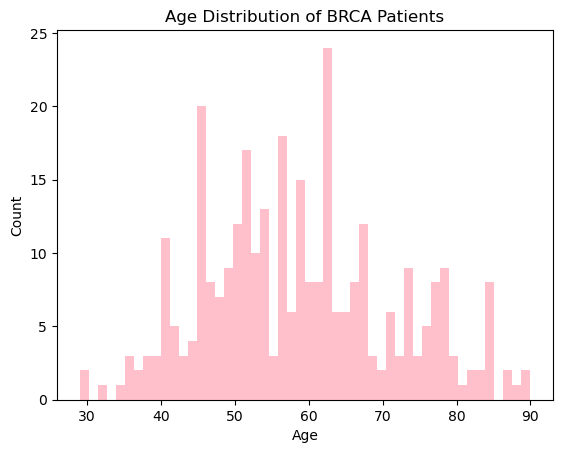

In [12]:
breast_cancer_df['Age'].hist(bins = 50, grid = False, color='pink')
plt.xlabel(xlabel = "Age")
plt.ylabel(ylabel = "Count")
plt.title("Age Distribution of BRCA Patients")



#### `Age` is normally distributed, with slight right skewness and most of population is around 45-65 years old.

In [13]:
# Separate categorical and numerical columns
categorical_columns = breast_cancer_df.select_dtypes(include=['object']).columns
numerical_columns = breast_cancer_df.select_dtypes(include=['float64', 'int64']).columns

In [14]:
# Calculate the Inter Quartile Range for each numerical column
Q1 = breast_cancer_df[numerical_columns].quantile(0.25)
Q3 = breast_cancer_df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers for each numerical column
outliers = {}
for column in numerical_columns:
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]
    outliers[column] = breast_cancer_df[(breast_cancer_df[column] < lower_bound) | (breast_cancer_df[column] > upper_bound)]

# Count the number of outliers for each numerical column
outlier_counts = {col: len(outliers[col]) for col in numerical_columns}

# Display the number of outliers for each numerical column
outlier_counts

{'Age': 0, 'Protein1': 7, 'Protein2': 0, 'Protein3': 5, 'Protein4': 4}

In [15]:
# Remove observations with outliers from the dataframe
for col in numerical_columns:
    breast_cancer_df = breast_cancer_df[(breast_cancer_df[col] >= Q1[col] - 1.5 * IQR[col]) & (breast_cancer_df[col] <= Q3[col] + 1.5 * IQR[col])]

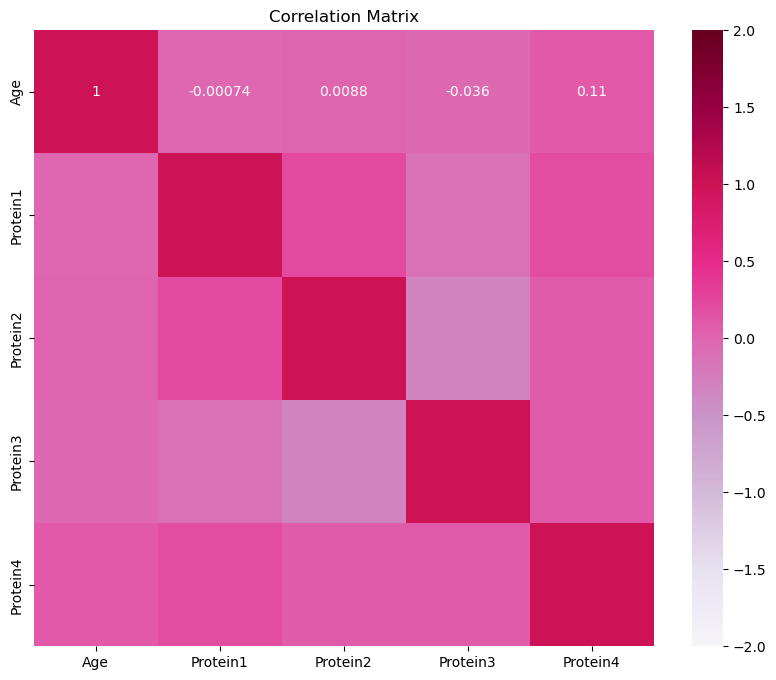

In [16]:
# Evaluate the Spearman correlation between numerical columns
correlation_matrix = breast_cancer_df[numerical_columns].corr(method='spearman') 
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, vmin = -2, vmax = 2, cmap='PuRd')
plt.title('Correlation Matrix')
plt.show()




In [17]:
# Separate the features and the target variable
X = breast_cancer_df[numerical_columns]
y = breast_cancer_df['Patient_Status']
# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [18]:
# Drop the Age column from the dataframe
breast_cancer_df = breast_cancer_df.drop('Age', axis=1)


In [19]:
breast_cancer_df

,Patient_ID,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,TCGA-AN-A04A,FEMALE,0.231800,0.61804,-0.55779,-0.517350,III,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Simple Mastectomy,11-Nov-19,09-Feb-20,Dead
330,TCGA-A8-A085,MALE,0.732720,1.11170,-0.26952,-0.354920,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,01-Nov-19,04-Mar-20,Dead
331,TCGA-A1-A0SG,FEMALE,-0.719470,2.54850,-0.15024,0.339680,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,11-Nov-19,18-Jan-21,Dead
332,TCGA-A2-A0EU,FEMALE,0.479400,2.05590,-0.53136,-0.188480,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,21-Nov-19,19-Feb-21,Dead


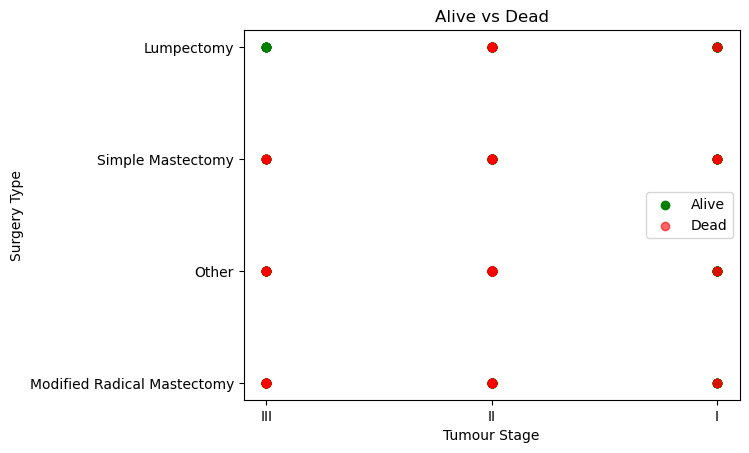

In [20]:
# Plot Scatter plot on Tumor Stage vs Surgery Type
A = breast_cancer_df[breast_cancer_df.Patient_Status == "Alive"]
D = breast_cancer_df[breast_cancer_df.Patient_Status == "Dead"]

#T= breast_cancer_df[breast_cancer_df.Tumour_Stage =="III"]

plt.title("Alive vs Dead")
plt.xlabel("Tumour Stage")
plt.ylabel("Surgery Type")
plt.scatter(A.Tumour_Stage, A.Surgery_type, color = "Green", label = "Alive", alpha = 1.0)
plt.scatter(D.Tumour_Stage, D.Surgery_type, color = "Red", label = "Dead", alpha = 0.6)
plt.legend()
plt.show()

#### From the above graph, we can see that for Tumor Stage 3, Lumpectomy can be performed to help the patient.

In [21]:
# Apply kernel PCA to the numerical columns to create new features to add to the dataframe
from sklearn.decomposition import KernelPCA
numerical_columns_pca = breast_cancer_df.select_dtypes(include=['float64', 'int64']).columns
kpca = KernelPCA(n_components=2, kernel='rbf', random_state=42)
kpca_features = kpca.fit_transform(breast_cancer_df[numerical_columns_pca])
breast_cancer_df['KPCA1'] = kpca_features[:, 0]
breast_cancer_df['KPCA2'] = kpca_features[:, 1]

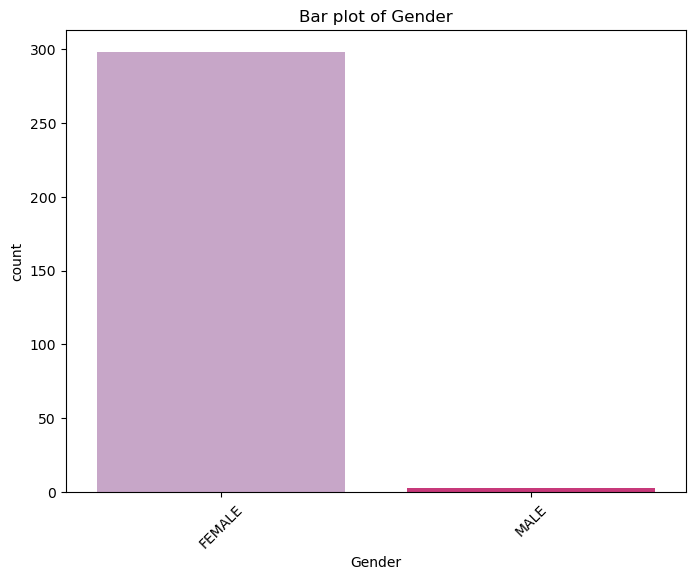

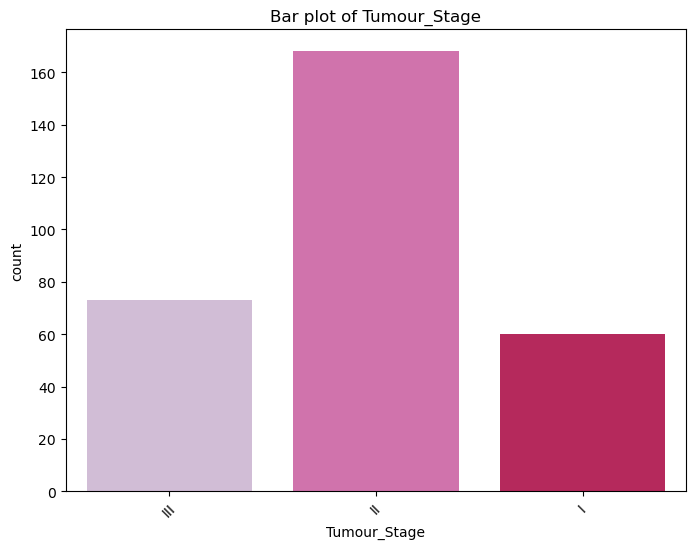

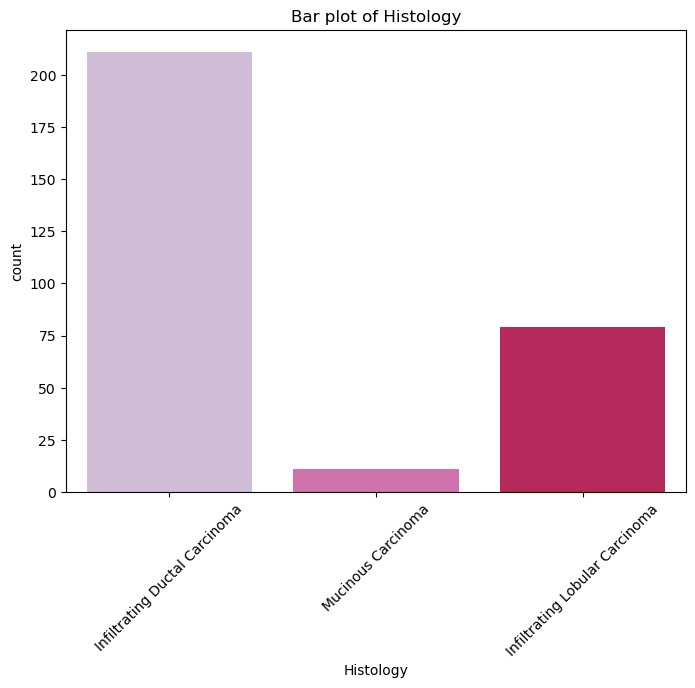

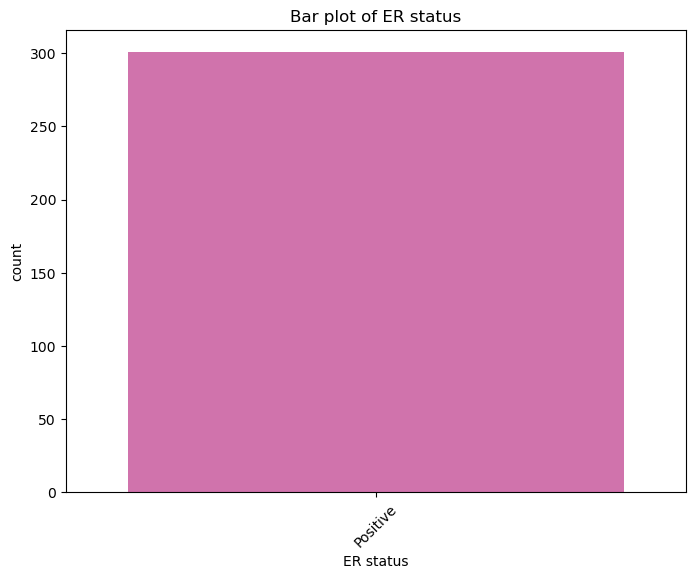

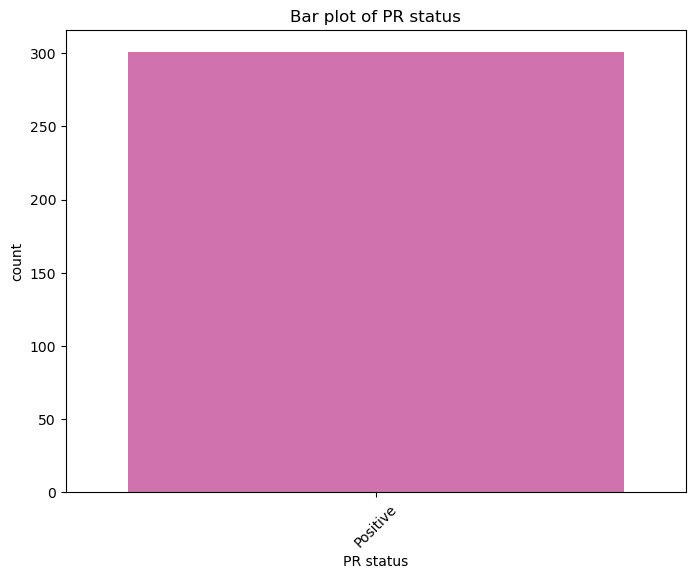

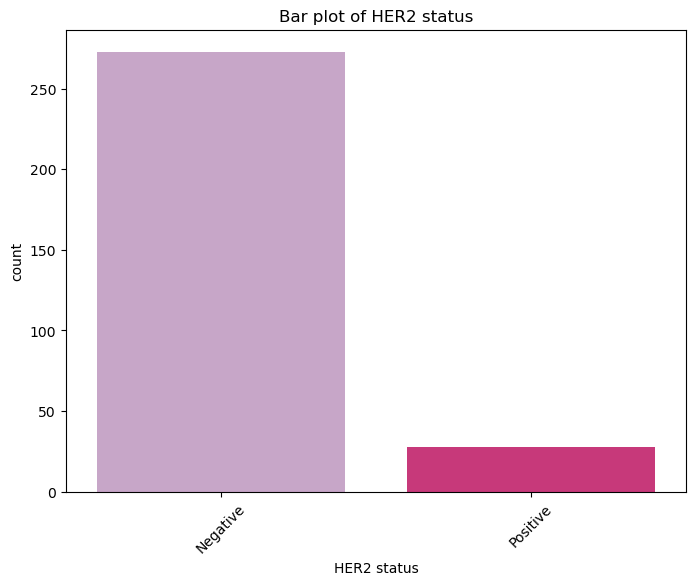

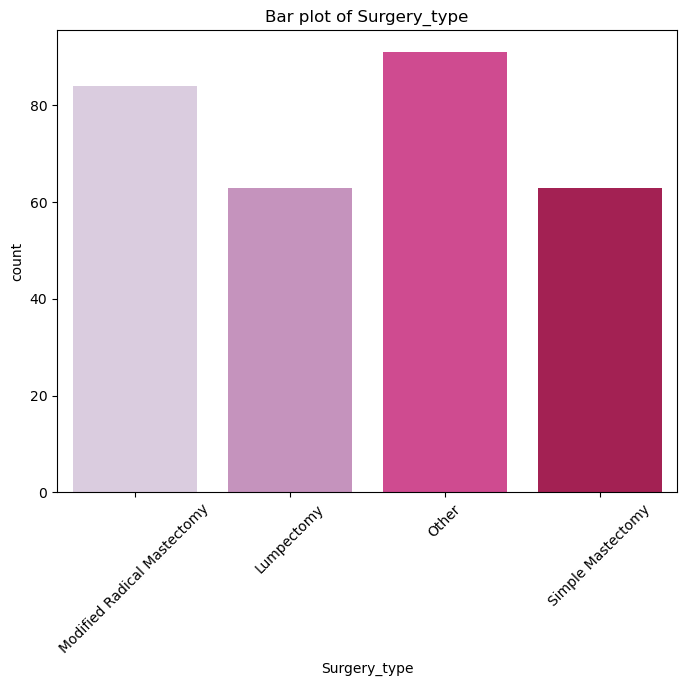

In [22]:
# Bar plot of the categorical columns to evaluate the distribution
for col in categorical_columns:
    if(col != 'Date_of_Surgery' and col != 'Date_of_Last_Visit' and col != 'Patient_Status' and col != 'Patient_ID'):
        plt.figure(figsize=(8, 6))
        sns.countplot(data=breast_cancer_df, x=col, palette='PuRd')
        plt.title(f'Bar plot of {col}')
        plt.xticks(rotation=45)
        plt.show()

In [23]:
# Drop the columns because they have one or almost unique value
breast_cancer_df=breast_cancer_df.drop(columns=['ER status','PR status','Gender'])

# Extract again the categorical columns
categorical_columns = breast_cancer_df.select_dtypes(include=['object']).columns

In [24]:
# Calculate the contingency table between columns

categorical_columns = ['Tumour_Stage', 'Histology', 'HER2 status', 'Surgery_type']
for col in categorical_columns:
    contingency_table = pd.crosstab(breast_cancer_df[col], breast_cancer_df['Patient_Status'])
    print(f'Contingency Table for {col}:')
    print(contingency_table)
    print('\n')

Contingency Table for Tumour_Stage:
Patient_Status  Alive  Dead
Tumour_Stage               
I                  51     9
II                135    33
III                56    17


Contingency Table for Histology:
Patient_Status                  Alive  Dead
Histology                                  
Infiltrating Ductal Carcinoma     169    42
Infiltrating Lobular Carcinoma     65    14
Mucinous Carcinoma                  8     3


Contingency Table for HER2 status:
Patient_Status  Alive  Dead
HER2 status                
Negative          218    55
Positive           24     4


Contingency Table for Surgery_type:
Patient_Status               Alive  Dead
Surgery_type                            
Lumpectomy                      55     8
Modified Radical Mastectomy     68    16
Other                           68    23
Simple Mastectomy               51    12




In [25]:
# Encode the categorical columns with one hot encoding except for Date_of_Surgery, Date_of_Last_Visit and Patient_Status
# Select the categorical columns to encode
categorical_columns_encode = ['Tumour_Stage', 'Histology', 'HER2 status', 'Surgery_type']

# Create a OneHotEncoder object
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False, dtype=int)

# Apply encoding to the specified columns
encoded_features = encoder.fit_transform(breast_cancer_df[categorical_columns_encode])

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns_encode))

# Remove the original columns and add the encoded ones
df_encoded = breast_cancer_df.drop(columns=categorical_columns_encode).reset_index(drop=True)
df_encoded = pd.concat([df_encoded, encoded_df], axis=1)



# Encode the target variable Patient_Status with LabelEncoder
df_encoded['Patient_Status'] = label_encoder.fit_transform(df_encoded['Patient_Status'])

df = df_encoded


In [26]:
#Introduce the variable Difference_Days and divide the date of surgery and date of last visit into day, month and year

# Change the data type of the 'Date_of_Surgery' and 'Date_of_Last_Visit' columns to datetime
df['Date_of_Surgery'] = pd.to_datetime(df['Date_of_Surgery'])
df['Date_of_Last_Visit'] = pd.to_datetime(df['Date_of_Last_Visit'])

# Calculate the difference in days between the date of last visit and the date of surgery
df['Difference_Days'] = (df['Date_of_Last_Visit'] - df['Date_of_Surgery']).dt.days

# Extract the day, month, and year from the 'Date_of_Surgery' and 'Date_of_Last_Visit' columns
df["Month_of_Surgery"] = df["Date_of_Surgery"].apply(lambda x : x.month)
df["Day_of_Surgery"] = df["Date_of_Surgery"].apply(lambda x : x.day)
df["Year_of_Surgery"] = df["Date_of_Surgery"].apply(lambda x : x.year)
df["Month_of_Last_visit"] = df["Date_of_Last_Visit"].apply(lambda x : x.month)
df["Day_of_Last_visit"] = df["Date_of_Last_Visit"].apply(lambda x : x.day)
df["Year_of_Last_visit"] = df["Date_of_Last_Visit"].apply(lambda x : x.year)

# Drop the 'Date_of_Surgery' and 'Date_of_Last_Visit' columns and change the display order of the columns
df = df.drop(['Date_of_Surgery', 'Date_of_Last_Visit'], axis=1)
df['Patient_Status'] = df.pop('Patient_Status')

### Model Development

In [27]:
df = df.drop('Patient_ID', axis=1)
X = df.drop(columns=['Patient_Status'])
y = df['Patient_Status']

# Split dataset into training and test set after feature generation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Check dimensions of the sets
print(f'Training set size: {X_train.shape[0]}')
print(f'Test set size: {X_test.shape[0]}')

Training set size: 210
Test set size: 91


In [28]:
# Use SMOTE to balance the training set
# Create a SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to the training set
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check the dimensions of the balanced training set
print(f'Balanced training set size: {X_train_balanced.shape[0]}')

X_train = X_train_balanced
y_train = y_train_balanced

Balanced training set size: 338


In [29]:
# Function to plot a confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    """
    Plots a confusion matrix using seaborn's heatmap visualization.

    Parameters:
    - y_true: array-like of true labels.
    - y_pred: array-like of predicted labels.
    - title: str, title of the plot.

    This function calculates the confusion matrix from true and predicted labels,
    then visualizes it with annotations and a color map of 'Blues'.
    """
    cm = confusion_matrix(y_true, y_pred)  # Calculate confusion matrix
    cmd = ConfusionMatrixDisplay(cm)
    cmd.plot(cmap='PuRd');
    plt.title(title)  # Set the title of the plot
    plt.xlabel('Predicted')  # Set x-axis label
    plt.ylabel('Actual')  # Set y-axis label
    
   
# Function to plot features importance
def plot_feature_importance(model, feature_names, title):
    """
    Plots the feature importance for tree-based machine learning models.

    Parameters:
    - model: the trained model object that has the attribute 'feature_importances_'.
    - feature_names: list or array of feature names.
    - title: str, title of the plot.

    This function plots the feature importances provided by the model, sorting them
    in descending order and displaying a bar plot.
    """
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.bar(range(len(importances)), importances[indices], align='center', color='pink')
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
    plt.xlim([-1, len(importances)])
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.show()



Model: XGBoost
Accuracy: 0.7802197802197802
              precision    recall  f1-score   support

           0       0.83      0.92      0.87        73
           1       0.40      0.22      0.29        18

    accuracy                           0.78        91
   macro avg       0.61      0.57      0.58        91
weighted avg       0.74      0.78      0.75        91



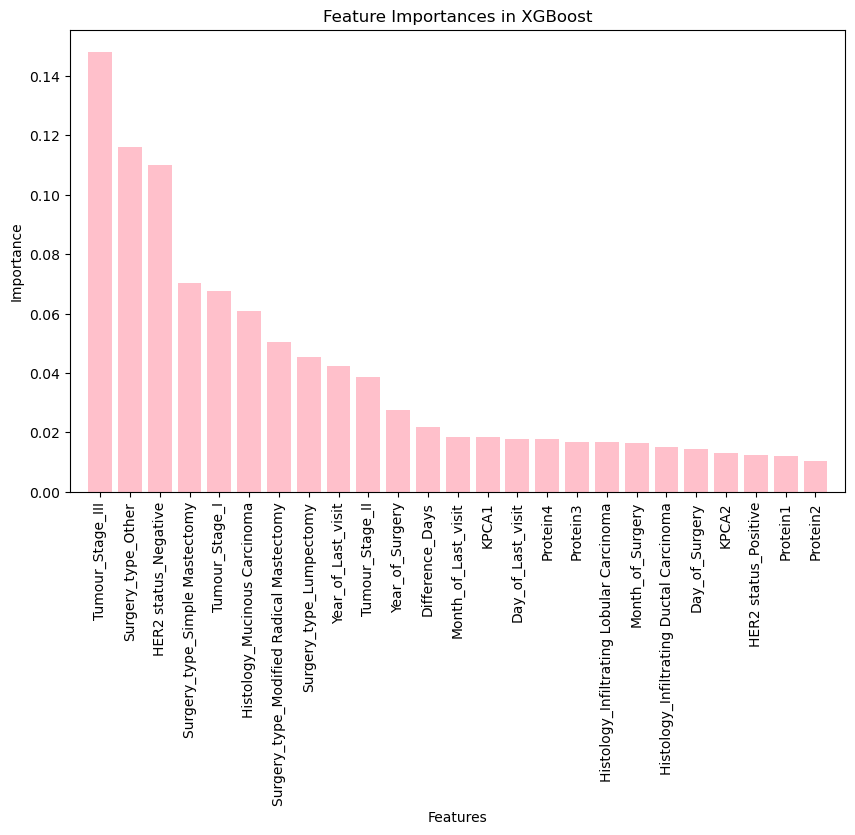

Model: RandomForest
Accuracy: 0.7472527472527473
              precision    recall  f1-score   support

           0       0.80      0.92      0.85        73
           1       0.14      0.06      0.08        18

    accuracy                           0.75        91
   macro avg       0.47      0.49      0.47        91
weighted avg       0.67      0.75      0.70        91



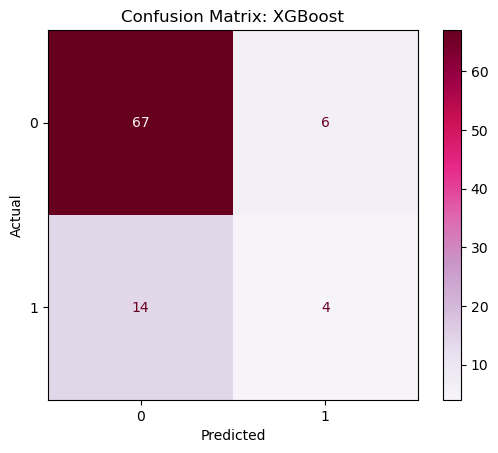

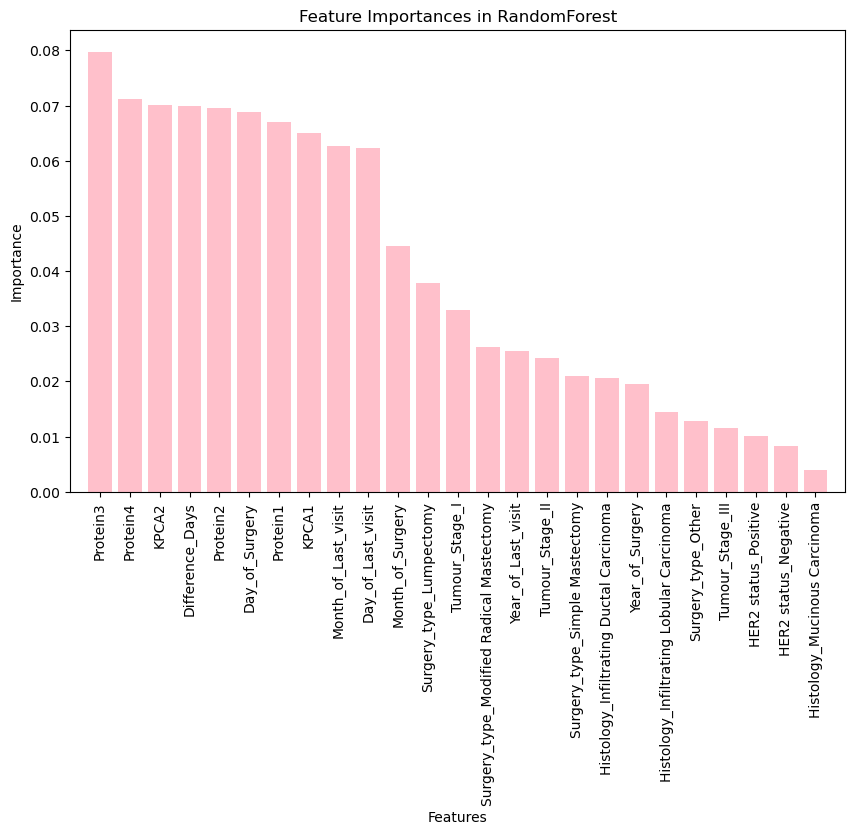

Model: DecisionTree
Accuracy: 0.6703296703296703
              precision    recall  f1-score   support

           0       0.81      0.77      0.79        73
           1       0.23      0.28      0.25        18

    accuracy                           0.67        91
   macro avg       0.52      0.52      0.52        91
weighted avg       0.70      0.67      0.68        91



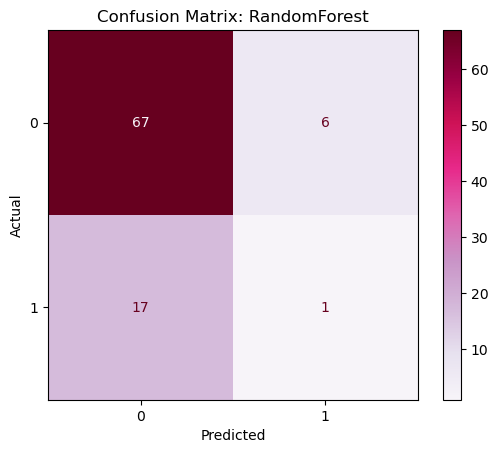

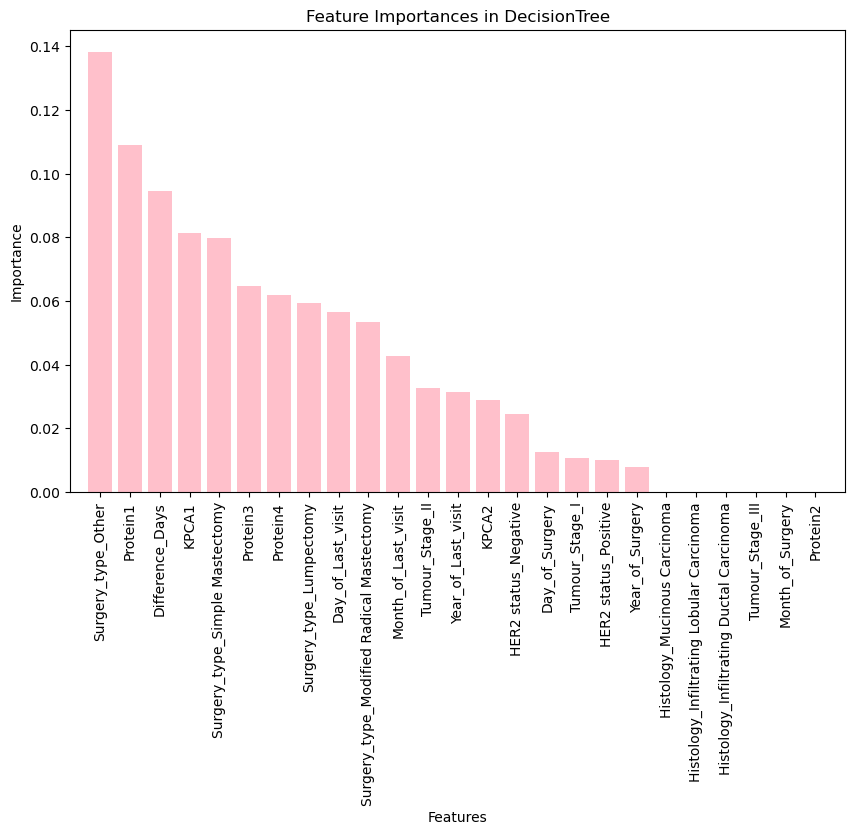

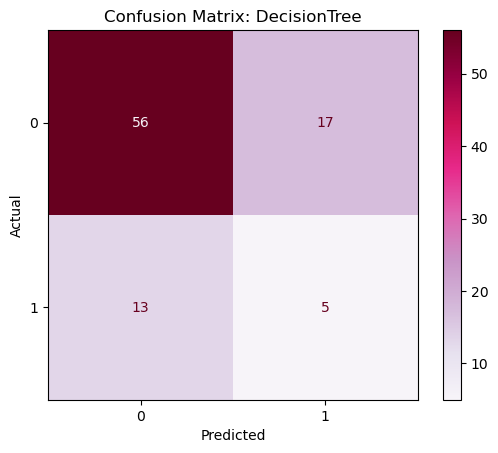

In [30]:
# Define the models to train, in this case, we will use XGBoost
models = {
    'XGBoost': XGBClassifier(),
    'RandomForest' : RandomForestClassifier(n_estimators=500),
    'DecisionTree' : DecisionTreeClassifier(criterion='gini',max_depth=15)    
}

# Dictionary to store the accuracy for comparison
model_accuracies = {}

# Train and evaluate the models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[name] = accuracy  # Store the accuracy of each model

    print(f"Model: {name}")
    print("Accuracy:", accuracy)
    print(classification_report(y_test, y_pred))

    # Optional: Feature importance and confusion matrix
    # Ensure these functions are defined or available in your environment
    plot_feature_importance(model, X.columns, f'Feature Importances in {name}')
    plot_confusion_matrix(y_test, y_pred, f'Confusion Matrix: {name}')

# Find the best model based on accuracy
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_model = models[best_model_name]

In [31]:
svc = SVC(probability=True)
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
clf = GridSearchCV(svc, parameters, n_jobs=50)
clf.fit(X_train, y_train)
GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 100], 'kernel': ('linear', 'rbf')})
clf.best_estimator_

SVC(C=1, kernel='linear', probability=True)

### Support Vector Classifier

Model: Support Vector Classifier
Accuracy: 0.6153846153846154
              precision    recall  f1-score   support

           0       0.78      0.73      0.75        73
           1       0.13      0.17      0.15        18

    accuracy                           0.62        91
   macro avg       0.45      0.45      0.45        91
weighted avg       0.65      0.62      0.63        91



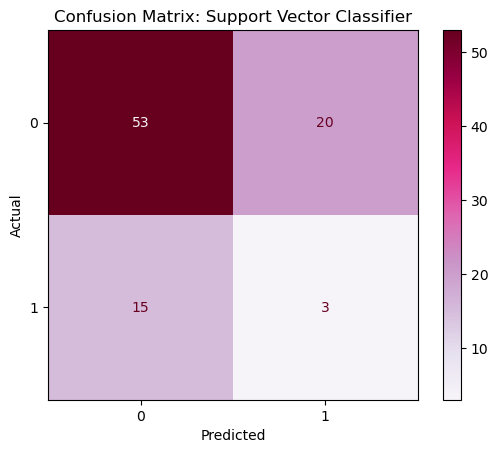

In [32]:
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
model_accuracies[name] = accuracy  # Store the accuracy of each model

print(f"Model: Support Vector Classifier")
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

# Ensure these functions are defined or available in your environment
plot_confusion_matrix(y_test, y_pred, f'Confusion Matrix: Support Vector Classifier')

best_model_name = max(model_accuracies, key=model_accuracies.get)
best_model = models[best_model_name]


### Logistic Regression

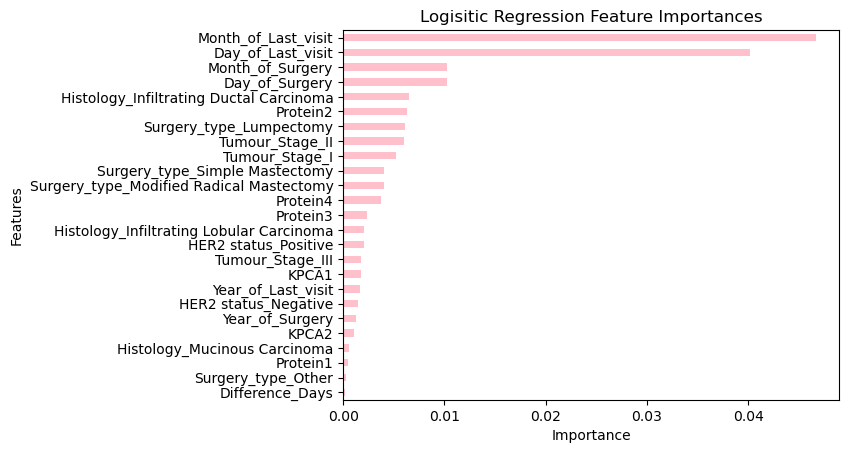

In [33]:
logit = LogisticRegression(max_iter=3500, penalty='elasticnet', solver = 'saga', l1_ratio=1)
logit.fit(X_train, y_train)
logit_importances = logit.coef_[0]
logit_feature_importances = pd.Series(index = X_train.columns, data= np.abs(logit_importances))
logit_feature_importances = logit_feature_importances.sort_values(ascending=True)
logit_feature_importances.plot(kind='barh', title = 'Logisitic Regression Feature Importances', xlabel = 'Importance', ylabel = 'Features', color='pink')
plt.show()

Model: Logistic Regression
Accuracy: 0.6263736263736264
              precision    recall  f1-score   support

           0       0.84      0.66      0.74        73
           1       0.26      0.50      0.35        18

    accuracy                           0.63        91
   macro avg       0.55      0.58      0.54        91
weighted avg       0.73      0.63      0.66        91



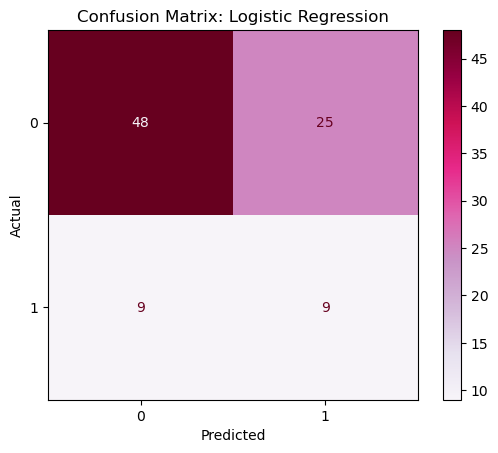

In [34]:
logit.fit(X_train, y_train)
y_pred = logit.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
model_accuracies[name] = accuracy  # Store the accuracy of each model

print(f"Model: Logistic Regression")
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

# Ensure these functions are defined or available in your environment
plot_confusion_matrix(y_test, y_pred, f'Confusion Matrix: Logistic Regression')

best_model_name = max(model_accuracies, key=model_accuracies.get)
best_model = models[best_model_name]


In [35]:
print("Best Model: ", best_model)

Best Model:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
